In [1]:
%load_ext autoreload
%autoreload 2

In [51]:
from ift6758.training import BasicModel
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from ift6758.features import FeatureEng
import pickle

In [49]:
# Get Data
train_val = pd.read_pickle('../ift6758/features/TrainValSets.pkl')
X_all = train_val.drop(['is_goal'], axis=1)
y_all = train_val['is_goal']

# Split into train val
X_train, X_val, y_train, y_val = train_test_split(X_all, y_all, test_size=0.3, random_state=42)

In [57]:
test = BasicModel(pickle.load(open('../train/LogisticReg_angle/model.pkl', 'rb')))
test.get_pred_probabilities(X_val['angle'])

IndexError: tuple index out of range

In [55]:
modelsDict = {
    'LogisticReg_angle': pickle.load(open('../train/LogisticReg_angle/model.pkl', 'rb'))
        .predict_proba(X_val['angle'].values.reshape(-1, 1))
}
modelsDict = {
    'LogisticReg_angle': BasicModel(pickle.load(open('../train/LogisticReg_angle/model.pkl', 'rb')))
        .get_pred_probabilities(X_val['angle'])
}

IndexError: tuple index out of range

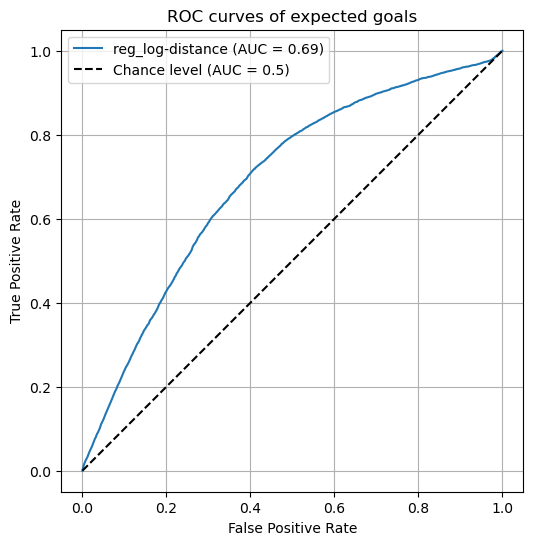

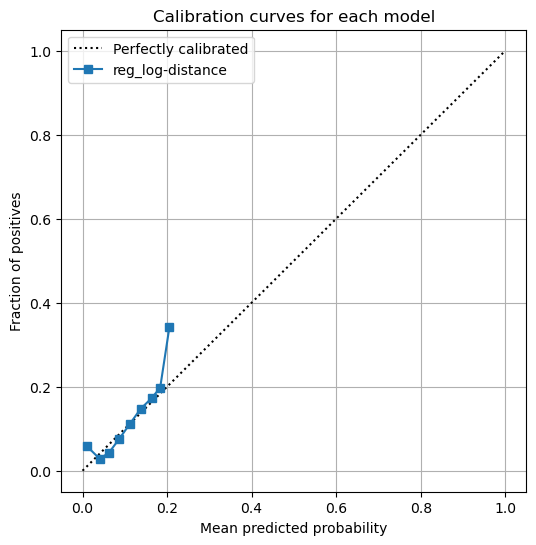

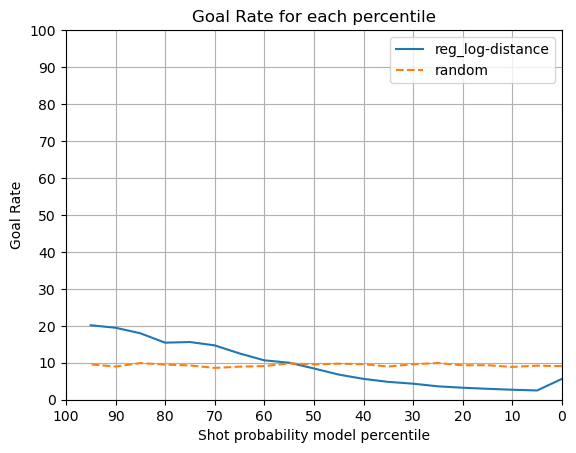

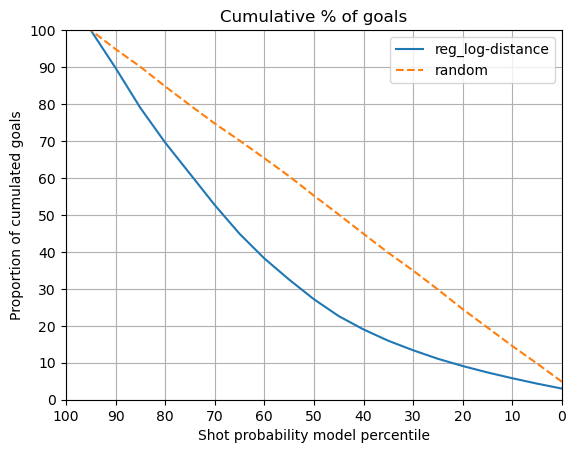

In [46]:
from ift6758.training.plot import *
y_pred_prob = clf.predict_proba(X_val['distance'].values.reshape(-1, 1))[:, 1]
plot_all({'reg_log-distance': y_pred_prob}, y_val, save_to_folder='../train/exp/test-pipeline/')